##### Краткое описание модуля scipy.integrate


Модуль scipy.integrate имеет две функции ode() и odeint(), которые предназначены для решения систем обыкновенных дифференциальных уравнений (ОДУ) первого порядка с начальными условиями в одной точке (т.е. задача Коши).

Функция ode() более универсальная, а функция odeint() (ODE integrator) имеет более простой интерфейс и хорошо решает большинство задач. 

In [4]:
from scipy.integrate import odeint

Функция odeint() имеет три обязательных аргумента и много опций. Она имеет следующий формат 

odeint(func, y0, t[,args=(), ...])

 Решение одного ОДУ

Допустим надо решить диф. уравнение 1-го порядка 
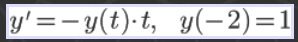

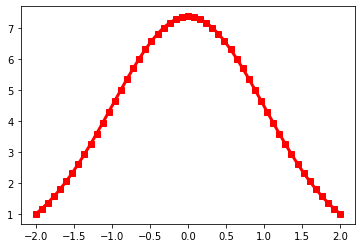

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

 # create function
def dydt(y, t):
	return -y*t

t = np.linspace( -2, 2, 51) # vector of time
y0 = 1 # start value
y = odeint(dydt, y0, t) # solve eq.
#y = np.array(y).flatten() 
plt.plot( t, y,'-sr', linewidth=3) # graphic
#plt.show() # display

Решение системы ОДУ

Пусть теперь мы хотим решить (автономную) систему диф. уравнений 1-го порядка 

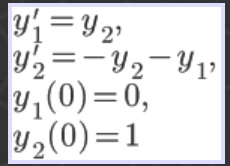

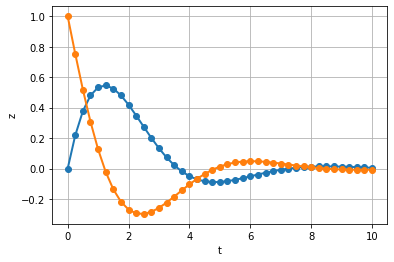

In [10]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt

 # create function
def f(y, t):
	y1, y2 = y
	return [y2, - y2 - y1]

t = np.linspace( 0, 10, 41) # vector of time
y0 = [0, 1] # start value
w = odeint(f, y0, t) # solve eq.
y1 = w[:,0]
y2 = w[:,1]
fig = plt.figure(facecolor='white')
plt.plot(t, y1, '-o', t, y2, '-o', linewidth=2)
plt.ylabel("z")
plt.xlabel("t")
plt.grid(True)
#plt.show() # display

Выходной массив w состоит из двух столбцов - y1(t) и y2(t).

Также можно построить фазовые траектории:

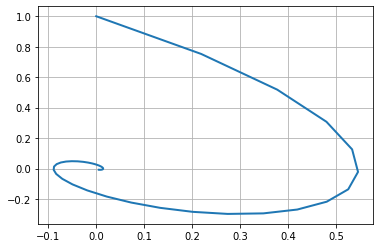

In [11]:
fig2 = plt.figure(facecolor='white')
plt.plot(y1, y2, linewidth=2)
plt.grid(True)
plt.show()

Решение системы ДУ методом Рунге-Кутты

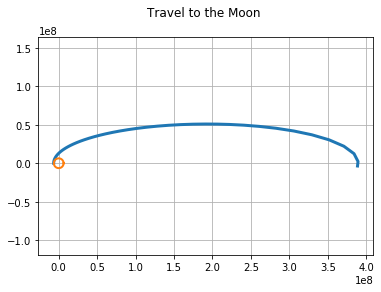

[4394987.66064084] [-3592364.31284197]
460000.0


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.integrate import ode


h=200000       #Orbit height
Re=6371000     #Earth radius
Rm=1738000     #Earth radius   
Rem=3844e5     #Moon orbit radius
G=6.67e-11
Me=5.97e24     #Earth mass
Mm=7.36e22     #Moon mass

T=428450#Flight time
Vm=m.sqrt(G*Me/(Rem))

V0=m.sqrt(G*Me/(Re+h))*1.41

def fout(t, y):# обработчик шага 
        ts.append(t)
        ys.append(list(y.copy()))
        y1, y2, y3, y4 = y
        if (m.sqrt((Rem-y1)**2+y3**2)<(Rm+3850)):
          return -1
 
def distToMoon(x,y,tm):
     xm, ym=Moonpos(tm)
     return m.sqrt((y-ym)**2+(x-xm)**2)
 
def Moonpos(tm):
    omega=Vm/Rem
    xm=Rm*m.cos(omega*(-T+tm))
    ym=Rm*m.sin(omega*(-T+tm))
    return xm,ym
    
        
# функция правых частей системы ОДУ
def f(t, y):
         y1, y2, y3, y4 = y
         xm, ym=Moonpos(t)
         ax=-y1*G*Me/((y1*y1+y3*y3)**1.5)+(xm-y1)*G*Mm/(distToMoon(y1,y3,t)**3)
         ay=-y3*G*Me/((y1*y1+y3*y3)**1.5)-(y3-ym)*G*Mm/(distToMoon(y1,y3,t)**3)
         return [y2,ax, y4,ay] 
     
tmax=460000         # максимально допустимый момент времени

y0,t0=[-Re-h, 0, 0, V0], 0 # начальные условия 
ODE=ode(f)
ODE.set_integrator('dopri5')#, max_step=0.01)
ODE.set_solout(fout)
fig, ax = plt.subplots()

ts, ys = [ ],[ ]
ODE.set_initial_value(y0, t0) 
ODE.integrate(tmax) 
     # решение ОДУ
Y=np.array(ys)

xc,yc=[],[]
for i in range(0, 630):
    xc.append(Re*m.cos(i/100))
    yc.append(Re*m.sin(i/100))



plt.plot(Y[:,0],Y[:,2],linewidth=3)#,label='k=%.1f'% k)
plt.axis('equal')
plt.plot(xc,yc,linewidth=2)

plt.title("Travel to the Moon \n ")
plt.grid(True)

  
plt.show()
print(Y[-1:,0]-Rem,Y[-1:,2])
print(ts[-1]);

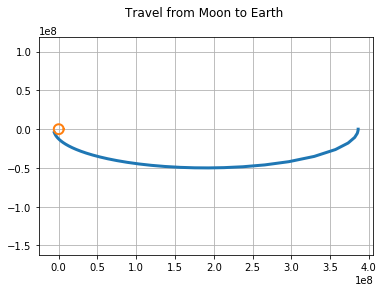

[-5711358.77986172] [-4324215.01863633]
430000.0


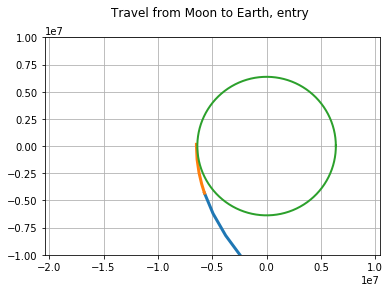

[-6451803.07768287] [128.85451058] [160653.12322719] [11068.56690075]
82802.93929097336 420.0


In [20]:
h=50000
Re=6371000
Rm=1738000
Rem=3844e5
G=6.67e-11
Me=5.97e24
Mm=7.36e22
T=428450#Flight time
Vm=m.sqrt(G*Me/(Rem))

V0=m.sqrt(G*Mm/(Re+h))*1.376

def fout(t, y):# обработчик шага 
        ts.append(t)
        ys.append(list(y.copy()))
        y1, y2, y3, y4 = y
        if (m.sqrt(y1**2+y3**2)<(Re+70000)):
          return -1
 
def distToMoon(x,y,tm):
     xm, ym=Moonpos(tm)
     return m.sqrt((y-ym)**2+(x-xm)**2)
 
def Moonpos(tm):
    omega=Vm/Rem
    xm=Rm*m.cos(omega*(tm))
    ym=Rm*m.sin(omega*(tm))
    return xm,ym
    
        
# функция правых частей системы ОДУ
def f(t, y):
         y1, y2, y3, y4 = y
         xm, ym=Moonpos(t)
         ax=-y1*G*Me/((y1*y1+y3*y3)**1.5)+(xm-y1)*G*Mm/(distToMoon(y1,y3,t)**3)
         ay=-y3*G*Me/((y1*y1+y3*y3)**1.5)-(y3-ym)*G*Mm/(distToMoon(y1,y3,t)**3)
         return [y2,ax, y4,ay] 
     
tmax=430000  
        

x_start=Rem+Rm+h
Vx_start=0
y_start=0
Vy_start=-V0+Vm

y0,t0=[x_start,  Vx_start, y_start, Vy_start], 0 # начальные условия 
ODE=ode(f)
ODE.set_integrator('dopri5')#, max_step=0.01)
ODE.set_solout(fout)
#fig, ax = plt.subplots()
#fig.set_facecolor('white')
  # перебор значений коэффициента сопротивления

ts, ys = [ ],[ ]
ODE.set_initial_value(y0, t0) # задание начальных значений
ODE.integrate(tmax)      # решение ОДУ
Y=np.array(ys)

xc,yc=[],[]
for i in range(0, 630):
    xc.append(Re*m.cos(i/100))
    yc.append(Re*m.sin(i/100))



plt.plot(Y[:,0],Y[:,2],linewidth=3)#,label='k=%.1f'% k)
plt.axis('equal')
plt.plot(xc,yc,linewidth=2)
plt.title("Travel from Moon to Earth \n ")

plt.grid(True)
#plt.xlim(0,8)
#plt.ylim(-0.1,2)
  
plt.show()
print(Y[-1:,0],Y[-1:,2])
print(ts[-1]);

#for t in range 0,

y0,t0=[Y[-1:,0], Y[-1:,1],  Y[-1:,2], Y[-1:,3]], 0 # начальные условия 
#ODE.set_integrator('dopri5', max_step=10)
ts, ys = [ ],[ ]
ODE.set_initial_value(y0, t0) # задание начальных значений
ODE.integrate(420)    
  # решение ОДУ
Y1=np.array(ys)
plt.plot(Y[-5:,0],Y[-5:,2],linewidth=3)
plt.plot(Y1[:,0],Y1[:,2],linewidth=3)
plt.plot(xc,yc,linewidth=2)


plt.title("Travel from Moon to Earth, entry \n ")
plt.axis('equal')
plt.grid(True)
plt.xlim(-1e7,0)
plt.ylim(-1e7,1e7)
plt.show()

print(Y1[-1:,0],Y1[-1:,1],Y1[-1:,2],Y1[-1:,3])
print(m.sqrt((Y1[-1:,0])**2+(Y1[-1:,2])**2)-Re,ts[-1]);

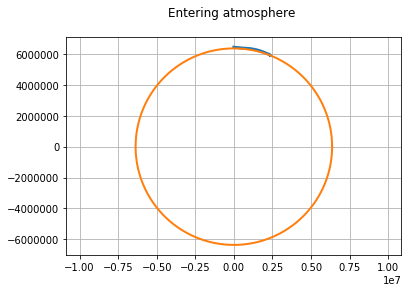

2989.969758922234 [-11.21226838] [-109.67900188]
599.2498534213637


In [25]:
h=0
Re=6371000
G=6.67e-11
Me=5.97e24
coeff_Cx=0.85
totalTime=0

S3_Diametr=6.6
TotalMass=5500
V0=0
angle=0

def fout(t, y):# обработчик шага 
        ts.append(t)
        ys.append(list(y.copy()))
        y1, y2, y3, y4 = y
        h = m.sqrt(y1*y1 +y3*y3) - Re
        if (h<=3000):
          return -1
  
    
def rho(x,y):
    '''с помощью линейной апроксимации определяет давление на необходимой нам высоте'''
    Space = [0, 1.85 * 0.00001, 1.5*0.0001, 3 * 0.0001, 1.03 * 0.001, 4 * 0.001, 7.26 * 0.001, 0.0136, 0.0251, 0.0469, 0.0889, 0.1216, 0.1665, 0.2279, 0.3119, 0.3648, 0.4135, 0.4671, 0.5258, 0.59, 0.6601, 0.7365, 0.8194, 0.9093, 1,1.1]
            # плотность для разных высот
    Space_lst = [100000, 80000, 70000, 60000, 50000, 40000, 36000, 32000, 28000, 24000, 20000, 18000, 16000, 14000, 12000, 11000, 10000, 9000, 8000, 7000, 6000, 5000, 4000, 3000,2000,1000]    
   
    h = m.sqrt(x*x +y*y) - Re
    
    i = 25
    while h > Space_lst[i]:
        i-=1
        if i < 0:
            return 0
           
    delta = h - Space_lst[i]
# разница между высотой и ближайшим значением
    delta_h = Space_lst[i-1] - Space_lst[i]
# разница между ближайшими соседями
    otn = delta/delta_h
# относительное отклонение
    p = Space[i] + ((Space[i-1] - Space[i]) * otn)
    return p


        
# функция правых частей системы ОДУ
def f(t, y):
             
         y1, y2, y3, y4 = y
               
         vv=m.sqrt(y2*y2+y4*y4)
         coeff_Cy=0.34*coeff_Cx
         Sm=1/465
         angle=40
         resistant_a=coeff_Cx*rho(y1,y3)*vv*vv*Sm/2
         lift_a=coeff_Cy*rho(y1,y3)*vv*vv*Sm/2*m.cos(angle*m.pi/180)
         ax=-y1*G*Me/((y1*y1+y3*y3)**1.5)-resistant_a*(y2/vv)-lift_a*(y4/vv)
         ay=-y3*G*Me/((y1*y1+y3*y3)**1.5)-resistant_a*(y4/vv)+lift_a*(y2/vv)
         a=m.sqrt(ax*ax+ay*ay)
         if a>120:
             print('oops',a)
        
         return [y2,ax, y4,ay] 

tmax=900  
       

x_start=0
Vx_start=11068
y_start=Re+75000
Vy_start=-1200

xc,yc=[],[]
for i in range(0, 630):
    xc.append(Re*m.cos(i/100))
    yc.append(Re*m.sin(i/100))


y0,t0=[x_start,  Vx_start, y_start, Vy_start], 0 # начальные условия 
ODE=ode(f)
ODE.set_integrator('dopri5')#, max_step=0.01)
ODE.set_solout(fout)
ts, ys = [ ],[ ]
ODE.set_initial_value(y0, t0) # задание начальных значений
ODE.integrate(tmax)      # решение ОДУ
Y=np.array(ys)

plt.plot(Y[:,0],Y[:,2],linewidth=3)#,label='k=%.1f'% k)
plt.axis('equal')
plt.plot(xc,yc,linewidth=2)
plt.title("Entering atmosphere \n ")

plt.grid(True)
#plt.xlim(0,8)
#plt.ylim(-0.1,2)
  
plt.show()
print(m.sqrt(Y[-1:,0]*Y[-1:,0] +Y[-1:,2]*Y[-1:,2])-Re,Y[-1:,1],Y[-1:,3]  )
print(ts[-1]);
